# Exploring type of Crime Incidents during certain times of day/week

Looking at San Francisco insidents summer 2014 to see if there is a pattern to found for types of crime during the day and through out the week. First we prepare the data and provide an hour category by stripping off minutes and then we pick the day of week.

In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
df['hour'] = df['Time'].apply(lambda x: int(x.split(':')[0]))
df['month'] = df['Date'].apply(lambda x: int(x.split('/')[0]))
days = df.DayOfWeek.unique()[::-1]
df['day_number'] = df['DayOfWeek'].apply(lambda x: np.where(days==x)[0][0])
categories=df.Category.unique()
df['category_id'] = df['Category'].apply(lambda x: np.where(categories==x)[0][0])
print plt.style.available
plt.style.use('fivethirtyeight')

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


Looking at the total number of incidents spread through out the days of the week there is hardly any noticable difference between weekend and weekdays.

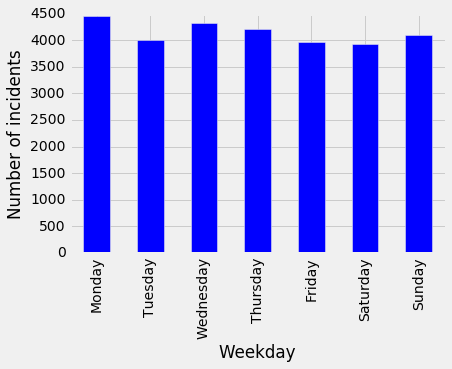

In [77]:
subset = df[['hour','DayOfWeek']]
groupby = subset.groupby(['DayOfWeek'])
table = groupby.count().unstack(level=-2)
table.plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6], days, rotation='vertical')
plt.xlabel("Weekday")
plt.ylabel("Number of incidents")
plt.show()

When the same is done for the hours of the day there is a noticable trend where activity starts early morning and then goes increasing and peeks round 6pm and then starts tapering of as the night settles. There is a small anomoly for the noon period which makes sense assuming that's when people are active.

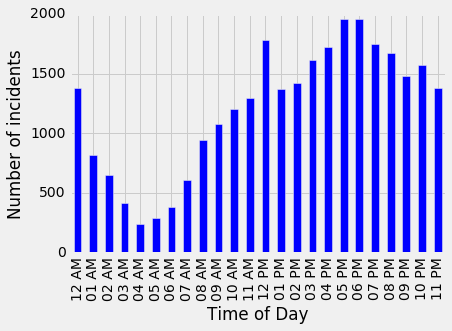

In [78]:
subset = df[['hour','day_number']]
groupby = subset.groupby(['hour'])
table = groupby.count().unstack()
table.plot(kind='bar')
hours = [(dt.time(i).strftime('%I %p')) for i in range(24)]
plt.xticks(range(24), hours, rotation='vertical')
plt.xlabel("Time of Day")
plt.ylabel("Number of incidents")
plt.show()

To decide what category to look at it would be helpful to see the distrobution of the categories

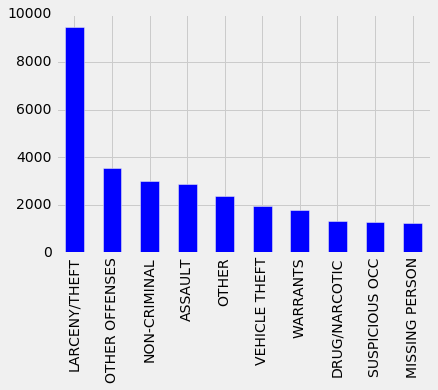

In [80]:
df['Category_cat'] = df['Category'].astype('category')
counts = df['Category_cat'].value_counts()
count_df = counts.to_frame()
df['category_limited'] = df['Category'].apply(lambda x: x if count_df.loc[x][0][0] > 500 else 'OTHER')
df['category_limited'].astype('category').value_counts().plot(kind='bar')
plt.show()

This bar plot shows that Larceny/Theft is the far most common incident that happened during the summer of 2014 in San Francisco.

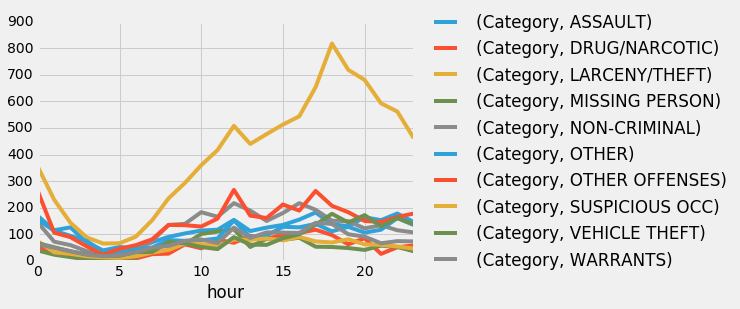

In [67]:
subset = df[['hour','category_limited', 'Category']]
table = subset.groupby(['hour', 'category_limited']).count().unstack()
table.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Looking at this it is evident that Larceny/Theft is most common during the late evening. And it is clear that the increse during those hours is more than with other categories of incididents.

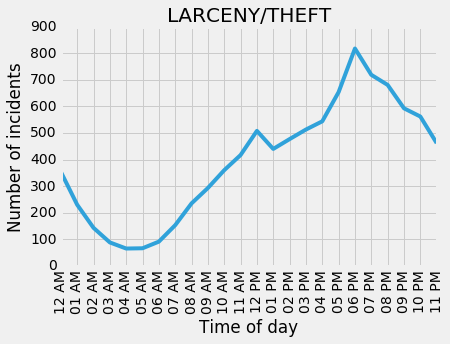

In [69]:
subset = df[['hour','Category']]
larceny_theft = subset[(subset['Category'] == 'LARCENY/THEFT')]
larceny_theft.groupby(['hour']).count().plot(kind='line', legend = False)
hours = [(dt.time(i).strftime('%I %p')) for i in range(24)]
plt.xticks(range(24), hours, rotation='vertical')
plt.xlabel("Time of day")
plt.ylabel("Number of incidents")
plt.title('LARCENY/THEFT')
plt.show()

Isolating the category gives a more detailed picture of when it peaks around 7pm.

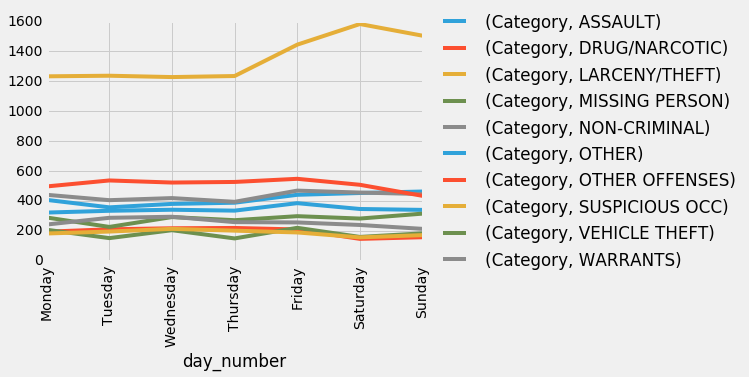

In [82]:
subset = df[['day_number','category_limited', 'Category']]
table = subset.groupby(['day_number', 'category_limited']).count().unstack()
table.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0,1,2,3,4,5,6], days, rotation='vertical')
plt.show()

Looking at the same for the days there is an visible trend for an increase in Larceny/Theft during the weekend.

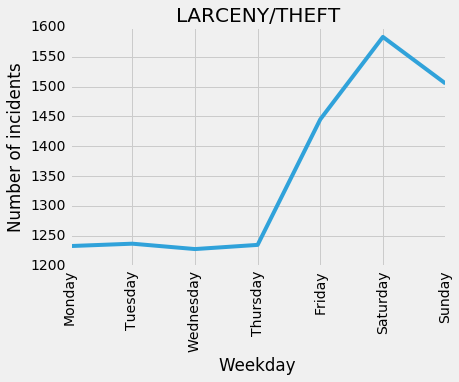

In [83]:
subset = df[['day_number','Category']]
larceny_theft = subset[(subset['Category'] == 'LARCENY/THEFT')]
larceny_theft.groupby(['day_number']).count().plot(kind='line', legend = False)
plt.xticks([0,1,2,3,4,5,6], days, rotation='vertical')
plt.xlabel("Weekday")
plt.ylabel("Number of incidents")
plt.title('LARCENY/THEFT')
plt.show()